In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [2]:
#read excel file into dataframe
happiness_data=pd.read_excel("Resources/WHR2015-21.xlsx")

#match data sets by year 
happiness_data = happiness_data.loc[happiness_data["Year"] < 2020]

#display dataframe 
happiness_data.head()

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Switzerland,7.587,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402
1,Iceland,7.561,2,2015,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834
2,Denmark,7.527,3,2015,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448
3,Norway,7.522,4,2015,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029
4,Canada,7.427,5,2015,10.642016,0.941860,71.443192,0.916792,0.285598,0.444144


In [3]:
#read csv file into dataframe
co2_emissions = pd.read_csv("Resources/owid-co2-data.csv")

#display dataframe
co2_emissions.head()

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.0,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.0,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [4]:
#clean data set for analysis
co2_emissions_data = co2_emissions[["country", "year","co2_per_capita","consumption_co2_per_capita", "cumulative_co2", "co2_per_gdp"]]
co2_emissions_data = co2_emissions_data.loc[co2_emissions_data["year"] > 2014]
co2_emissions_data = co2_emissions_data.rename(columns={"country": "Country", "year": "Year", 
                                                        "co2_per_capita":"CO2 per Capita",
                                                        "consumption_co2_per_capita": "CO2 Consumption per Capita",
                                                        "cumulative_co2": "Cumulative CO2",
                                                        "co2_per_gdp": "CO2 per GDP"
    
                                                       })

#display dataframe
co2_emissions_data.head()

,Country,Year,CO2 per Capita,CO2 Consumption per Capita,Cumulative CO2,CO2 per GDP
66,Afghanistan,2015,0.230,NaN,146.598,0.126
67,Afghanistan,2016,0.191,NaN,153.343,0.105
68,Afghanistan,2017,0.189,NaN,160.203,0.100
69,Afghanistan,2018,0.281,NaN,170.655,0.155
70,Afghanistan,2019,0.282,NaN,181.376,NaN


In [5]:
#number of countries in happiness data
happy_countries = len(happiness_data["Country"].unique())

#number of countries in co2 data
co2_countries = len(co2_emissions_data["Country"].unique())

#print variables into statement
print(f"There are {happy_countries} in the happiness data and {co2_countries} in the co2 emissions data.")

There are 164 in the happiness data and 239 in the co2 emissions data.


In [6]:
#display countries in happiness data
happiness_data["Country"].sort_values().unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosov

In [7]:
#display countries in co2 data
co2_emissions_data["Country"].sort_values().unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia (excl. China & India)',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'EU-27', 'EU-28',
       'Ecuador', 'Egypt', 'El Salvado

In [8]:
#merge data sets and display dataframe
combined_data= pd.merge(happiness_data,co2_emissions_data, how="left",on=["Country", "Year"])
combined_data.dropna(inplace=True)

combined_data.head()

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,CO2 per Capita,CO2 Consumption per Capita,Cumulative CO2,CO2 per GDP
0,Switzerland,7.587,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402,4.668,14.420,2839.465,0.078
2,Denmark,7.527,3,2015,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448,6.184,8.890,3918.710,0.139
3,Norway,7.522,4,2015,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029,8.722,9.390,2424.960,0.106
4,Canada,7.427,5,2015,10.642016,0.941860,71.443192,0.916792,0.285598,0.444144,15.986,16.134,30813.516,0.368
5,Finland,7.406,6,2015,10.531513,0.940039,70.846245,0.925070,0.000338,0.310990,8.048,11.878,2971.520,0.219


In [9]:
number = len((combined_data["Country"]).unique())
number

116

The correlation between the two values is 0.46


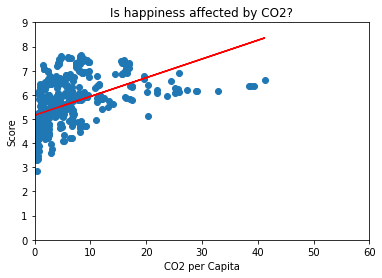

In [53]:
correlation = round(st.pearsonr(combined_data["CO2 per Capita"], combined_data["Score"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between the two values is {correlation:.2f}")

# establish linear regression values
model = st.linregress(combined_data["CO2 per Capita"], combined_data["Score"])

# linear regression line 
yvalues = (combined_data["CO2 per Capita"] * model[0]) + model[1]

plt.scatter(combined_data["CO2 per Capita"], combined_data["Score"])
plt.plot(combined_data["CO2 per Capita"], yvalues, color = "red")

plt.xlim(0,60)
plt.ylim(0,9)

#labels
plt.title("Is happiness affected by CO2?")
plt.xlabel("CO2 per Capita")
plt.ylabel("Score")

plt.show()

In [22]:
#Top ranked countries
Happiest = combined_data.loc[combined_data["Rank"] <= 10]

#Lowest rank countries
Saddest = combined_data.loc[combined_data["Rank"] >= 149]

The correlation between the two values is -0.41


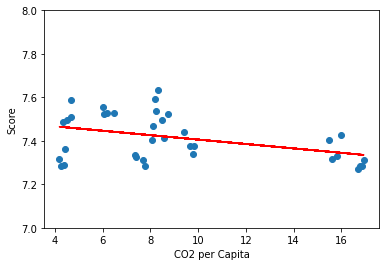

In [60]:
correlation = round(st.pearsonr(Happiest["CO2 per Capita"], Happiest["Score"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between the two values is {correlation:.2f}")

# establish linear regression values
model = st.linregress(Happiest["CO2 per Capita"], Happiest["Score"])

# linear regression line 
yvalues = (Happiest["CO2 per Capita"] * model[0]) + model[1]

# scatter plot of the data
plt.scatter(Happiest["CO2 per Capita"], Happiest["Score"])
plt.ylim(7,8)

plt.xlabel ("CO2 per Capita")
plt.ylabel ("Score")

plt.plot(Happiest["CO2 per Capita"], yvalues, color = "red")

plt.show()

The correlation between the two values is -0.28


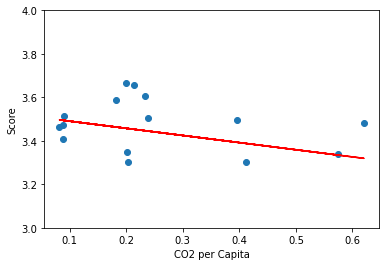

In [61]:
correlation = round(st.pearsonr(Saddest["CO2 per Capita"], Saddest["Score"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between the two values is {correlation:.2f}")

# establish linear regression values
model = st.linregress(Saddest["CO2 per Capita"], Saddest["Score"])

# linear regression line 
yvalues = (Saddest["CO2 per Capita"] * model[0]) + model[1]

# scatter plot of the data
plt.scatter(Saddest["CO2 per Capita"], Saddest["Score"])
plt.ylim(3,4)
plt.xlabel ("CO2 per Capita")
plt.ylabel ("Score")

plt.plot(Saddest["CO2 per Capita"], yvalues, color = "red")

plt.show()

The correlation between the two values is 0.57


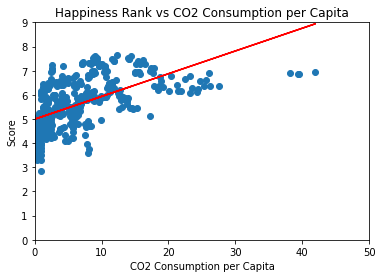

In [56]:
correlation = round(st.pearsonr(combined_data["CO2 Consumption per Capita"], combined_data["Score"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between the two values is {correlation:.2f}")

# establish linear regression values
model = st.linregress(combined_data["CO2 Consumption per Capita"], combined_data["Score"])

# linear regression line 
yvalues = (combined_data["CO2 Consumption per Capita"] * model[0]) + model[1]

plt.scatter(combined_data["CO2 Consumption per Capita"], combined_data["Score"])
plt.plot(combined_data["CO2 Consumption per Capita"], yvalues, color = "red")

plt.xlim(0,50)
plt.ylim(0,9)

#labels
plt.title("Happiness Rank vs CO2 Consumption per Capita")
plt.xlabel("CO2 Consumption per Capita")
plt.ylabel("Score")

plt.show()

The correlation between the two values is -0.05


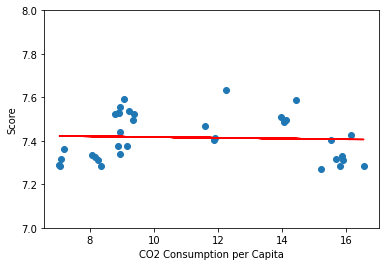

In [62]:
correlation = round(st.pearsonr(Happiest["CO2 Consumption per Capita"], Happiest["Score"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between the two values is {correlation:.2f}")

# establish linear regression values
model = st.linregress(Happiest["CO2 Consumption per Capita"], Happiest["Score"])

# linear regression line 
yvalues = (Happiest["CO2 Consumption per Capita"] * model[0]) + model[1]

# scatter plot of the data
plt.scatter(Happiest["CO2 Consumption per Capita"], Happiest["Score"])
plt.ylim(7,8)
plt.xlabel ("CO2 Consumption per Capita")
plt.ylabel ("Score")

plt.plot(Happiest["CO2 Consumption per Capita"], yvalues, color = "red")

plt.show()

The correlation between the two values is -0.55


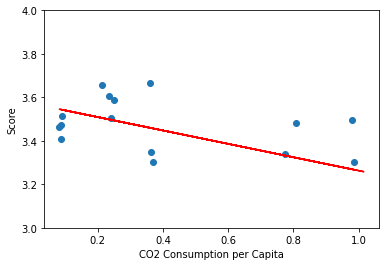

In [63]:
correlation = round(st.pearsonr(Saddest["CO2 Consumption per Capita"], Saddest["Score"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between the two values is {correlation:.2f}")

# establish linear regression values
model = st.linregress(Saddest["CO2 Consumption per Capita"], Saddest["Score"])

# linear regression line 
yvalues = (Saddest["CO2 Consumption per Capita"] * model[0]) + model[1]

# scatter plot of the data
plt.scatter(Saddest["CO2 Consumption per Capita"], Saddest["Score"])
plt.ylim(3,4)
plt.xlabel ("CO2 Consumption per Capita")
plt.ylabel ("Score")

plt.plot(Saddest["CO2 Consumption per Capita"], yvalues, color = "red")

plt.show()